## YouTube's Inner World: A Data Exploration of Channel and Video Dynamics

Based on large-Scale channel and video Metadata from English-Speaking YouTube, we have a deep dive into this dataset. Featuring on time series analyzing, AI-based prediction, and ..., we explore, analyze, and concentrate the trends and characteristics of YouTube's channel. Insights are unlocked and shown at advanced visualization way.

#### Research Group
- `name`: Laughtodeath666
- `member`: ...

#### Dataset description
- `df_channels_en.tsv.gz`: contains data related to channel, category, join data, channel id & name, subscribers, rank, ect.
    - `category_cc`: category of the channel
    - `join_date`: join date of the channel
    - `channel`: channel id
    - `name_cc`: name of the channel
    - `subscribers_cc`: number of subscribers
    - `videos_cc`: number of videos
    - `subscriber_rank_sb`: rank in terms of number of subscribers
    - `weights`: weights cal
    - Note: 
        136,470 rows in total; 
        obtain it in 27/10/2019; 
        filter non-english channels.
- `df_timeseries_en.csv.gz`: latest category, datetime, views, subs, videos, and their changing amount.
    - `channel`: channel id
    - `category`: category according to the last 10 videos at time of crawl
    - `datetime`: week related to the data point
    - `views`: total number of views the channel had this week
    - `delta_views`: delta subscribers obtained this week
    - `subs`: total number of subscribers the channel had this week
    - `delta_subs`: rank in terms of number of subscribers
    - `videos`: total number of videos the channel had this week
    - `delta_videos`: delta videos obtained this week
    - `activity`: number of videos published in the last 15 days
    - Note: 18,872,499 data points belonging to 153,550 channels; 2.8 years of data for each channel in average; filter non-english channels; Data goes from early/01/2015 to end/09/2019 (incomplete time frame for some channels)
- `yt_metadata_en.jsonl.gz`: for each video of every channel, category, description, like/dislike counts, duration, tags, views, etc.
- `youtube_comments.tsv.gz`: anonymized user id, video id, replies, and likes received.

#### Our Tasks
- `Overall Profile Analysis`: Visualize the distributions, correlations, and trends of each features.
- `Duration Modeling and Analysis`: Taking multiple factors into account, model the duration-orientated comprehensive judging model.
- `YouTube channel strategies`: 

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
data_folder = './data/'
df_channels = pd.read_csv(data_folder + 'df_channels_en.tsv', sep='\t')
df_channels.columns = ['category', 'join_dt', 'chan_id', 'chan_name', 'subs_sum', 'videos_sum', 'rank', 'weights']
data_folder = './data/'
df_timeseries = pd.read_csv(data_folder + 'df_timeseries_en.tsv', sep='\t')
df_timeseries.columns = ['chan_id', 'category', 'curr_dt', 'views_t', 'delta_views_t', 'subs_t', 'delta_subs_t', 'videos_t', 'delta_videos_t', 'activity']

In [79]:
df_channels.head(10)

,category,join_dt,chan_id,chan_name,subs_sum,videos_sum,rank,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.087
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.087
3,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.087
4,Sports,2007-05-11,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,48400000,43421,11.0,2.087
5,Entertainment,2007-01-15,UCIwFjwMjI0y7PDBVEO9-bkQ,Justin Bieber,46574085,134,12.0,2.087
6,Music,2014-03-12,UCFFbwnve3yF62-tVXkTyHqg,Zee Music Company,43451109,4241,13.0,2.087
7,Sports,2009-03-17,UCRijo3ddMTht_IHyNSNXpNQ,Dude Perfect,45800000,213,14.0,2.087
8,Entertainment,2015-05-12,UCk8GzjMOrta8yxDcKfylJYw,✿ Kids Diana Show,34700000,599,16.0,2.087
9,Music,2006-08-08,UC0C-w0YjGpqDXGB8IHb662A,Ed Sheeran,42000000,154,17.0,2.087


In [80]:
df_timeseries.head(10)

,chan_id,category,curr_dt,views_t,delta_views_t,subs_t,delta_subs_t,videos_t,delta_videos_t,activity
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03 00:00:00,2.024946e+05,0.000000,650.222222,0.000000,5,0,3
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10 00:00:00,3.940857e+05,191591.111111,1046.000000,395.777778,6,1,1
2,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-17 00:00:00,8.353938e+05,441308.083333,1501.500000,455.500000,6,0,1
3,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-24 00:00:00,1.104577e+06,269183.250000,1750.000000,248.500000,6,0,0
4,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-31 00:00:00,1.284406e+06,179828.600000,2008.300000,258.300000,6,0,0
5,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-08-07 00:00:00,1.493380e+06,208974.200000,2270.200000,261.900000,6,0,0
6,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-08-14 00:00:00,1.721383e+06,228003.200000,2531.700000,261.500000,6,0,0
7,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-08-21 00:00:00,1.932405e+06,211022.000000,2774.600000,242.900000,6,0,0
8,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-08-28 00:00:00,2.221636e+06,289230.750000,3220.250000,445.650000,6,0,0
9,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-09-04 00:00:00,2.632813e+06,411177.535714,4114.285714,894.035714,6,0,0


In [81]:
# data verify
numeric_df_channels = df_channels.select_dtypes(include=[np.number])
print("df_channels missing:", len(df_channels[df_channels.isna().any(axis=1)]) )
print("df_channels infinite:", len(numeric_df_channels[np.isinf(numeric_df_channels).any(axis=1)]) )
print("df_channels null string:", len(df_channels[df_channels.map(lambda x: x == "").any(axis=1)]) )

numeric_df_timeseries = df_timeseries.select_dtypes(include=[np.number])
print("df_timeseries missing:", len(df_timeseries[df_timeseries.isna().any(axis=1)]) )
print("df_timeseries infinite:", len(numeric_df_timeseries[np.isinf(numeric_df_timeseries).any(axis=1)]) )
print("df_timeseries null string:", len(df_timeseries[df_timeseries.map(lambda x: x == "").any(axis=1)]) )


df_channels missing: 139
df_channels infinite: 0
df_channels null string: 0
df_timeseries missing: 20584
df_timeseries infinite: 0
df_timeseries null string: 0


In [82]:
# apply mean value to NaN point (only for numeric entry)
numeric_df_channels.fillna(numeric_df_channels.mean())
numeric_df_timeseries.fillna(numeric_df_timeseries.mean())
print("df_channels missing:", len(df_channels[df_channels.isna().any(axis=1)]) )
print("df_timeseries missing:", len(df_timeseries[df_timeseries.isna().any(axis=1)]) )

df_channels missing: 139
df_timeseries missing: 20584


In [84]:
# compute missing data for each column
nan_df_channels = df_channels[df_channels.isna().any(axis=1)]
print("df_channels category missing", len(nan_df_channels[nan_df_channels.loc[:,'category'].isna()]))
print("df_channels join_dt missing", len(nan_df_channels[nan_df_channels.loc[:,'join_dt'].isna()]))
print("df_channels chan_id missing", len(nan_df_channels[nan_df_channels.loc[:,'chan_id'].isna()]))
print("df_channels chan_name missing", len(nan_df_channels[nan_df_channels.loc[:,'chan_name'].isna()]))
print("df_channels subs_sum missing", len(nan_df_channels[nan_df_channels.loc[:,'subs_sum'].isna()]))
print("df_channels videos_sum missing", len(nan_df_channels[nan_df_channels.loc[:,'videos_sum'].isna()]))
print("df_channels rank missing", len(nan_df_channels[nan_df_channels.loc[:,'rank'].isna()]))
print("df_channels weights missing", len(nan_df_channels[nan_df_channels.loc[:,'weights'].isna()]))

nan_df_timeseries = df_timeseries[df_timeseries.isna().any(axis=1)]
print("df_timeseries chan_id missing", len(nan_df_timeseries[nan_df_timeseries.loc[:,'chan_id'].isna()]))
print("df_timeseries category missing", len(nan_df_timeseries[nan_df_timeseries.loc[:,'category'].isna()]))
print("df_timeseries curr_dt missing", len(nan_df_timeseries[nan_df_timeseries.loc[:,'curr_dt'].isna()]))

df_channels category missing 128
df_channels join_dt missing 1
df_channels chan_id missing 0
df_channels chan_name missing 10
df_channels subs_sum missing 0
df_channels videos_sum missing 0
df_channels rank missing 0
df_channels weights missing 0
df_timeseries chan_id missing 0
df_timeseries category missing 20584
df_timeseries curr_dt missing 0


Now we know the sources of missing/NaN data of our dateframes. For repairing it, we try to find the missing data point and fill it by searching the corresponding data in another dataframe. For example, we can locate the missing term in df_timeseries and use its chan_id to find the corresponding data in df_channels.

In [128]:
nan_df_channels.head()

,category,join_dt,chan_id,chan_name,subs_sum,videos_sum,rank,weights
62,Entertainment,NaN,UCBR8-60-B28hp2BmDPdntcQ,YouTube,28200000,301,110.0,2.0870
6941,NaN,2009-05-12,UCa_4DcdTB9QfK0LY9-7qWuQ,AbbaVEVO,995000,36,17265.0,2.8200
8295,NaN,2012-12-23,UCVOftvvuyipcn7102TUFsSQ,Baka Oppai,760128,27,21172.0,2.9225
8885,NaN,2009-06-05,UCqH2YMSzMaGN92Vc3VkhWnQ,Sony Pictures Home E...,770000,6561,22799.0,2.9595
10449,NaN,2009-10-15,UCnzCV_PxVZ-hsOrTy2NGxJw,EuropeVEVO,654000,19,27450.0,2.9825


In [110]:
nan_df_timeseries.head()

,chan_id,category,curr_dt,views_t,delta_views_t,subs_t,delta_subs_t,videos_t,delta_videos_t,activity
442874,UChxLXL97wslyFHJiBHgt86w,NaN,2016-06-20 00:00:00,203924.000,0.000,4178.000,0.00,164,0,4
442875,UChxLXL97wslyFHJiBHgt86w,NaN,2016-06-27 00:00:00,207172.875,3248.875,4110.625,0.00,165,1,5
442876,UChxLXL97wslyFHJiBHgt86w,NaN,2016-07-04 00:00:00,210295.000,3122.125,4107.000,0.00,167,2,4
442877,UChxLXL97wslyFHJiBHgt86w,NaN,2016-07-11 00:00:00,212589.750,2294.750,4110.250,3.25,167,0,2
442878,UChxLXL97wslyFHJiBHgt86w,NaN,2016-07-18 00:00:00,215376.500,2786.750,4124.500,14.25,170,3,3


In [126]:
# repair df_timeseries
my_series = df_channels.loc[:,'chan_id']
count = 0 # track how many repairment has failed
for row in nan_df_timeseries.loc[:,'chan_id']:
    loc_array = np.where(my_series.values == row)[0]
    if len(loc_array) > 0: # if we do find the corresponding data in df_channels via chan_id in nan_df_timeseries
        if np.isnan(df_channels.iloc[loc_array[0]]['category']): # if the category in df_channels is also NaN, we count
            count = count + 1
        else:
            print(df_channels.iloc[loc_array[0]]['category'])
count


20584

Sadly, at least for the missing data points in df_timeseries, we won't be able to repair them by checking the corresponding data in df_channels. So we have omit them.

In [133]:
# re-construct df_channels and df_timeseires
df_channels = df_channels[~df_channels.isna().any(axis=1)]
df_timeseries = df_timeseries[~df_timeseries.isna().any(axis=1)]

In [166]:
df_gb = df_channels.loc[:,['category','subs_sum','videos_sum','rank','weights']].groupby('category')
df_gb_count = df_gb.size().reset_index()
df_gb_count.columns = ['category','count']


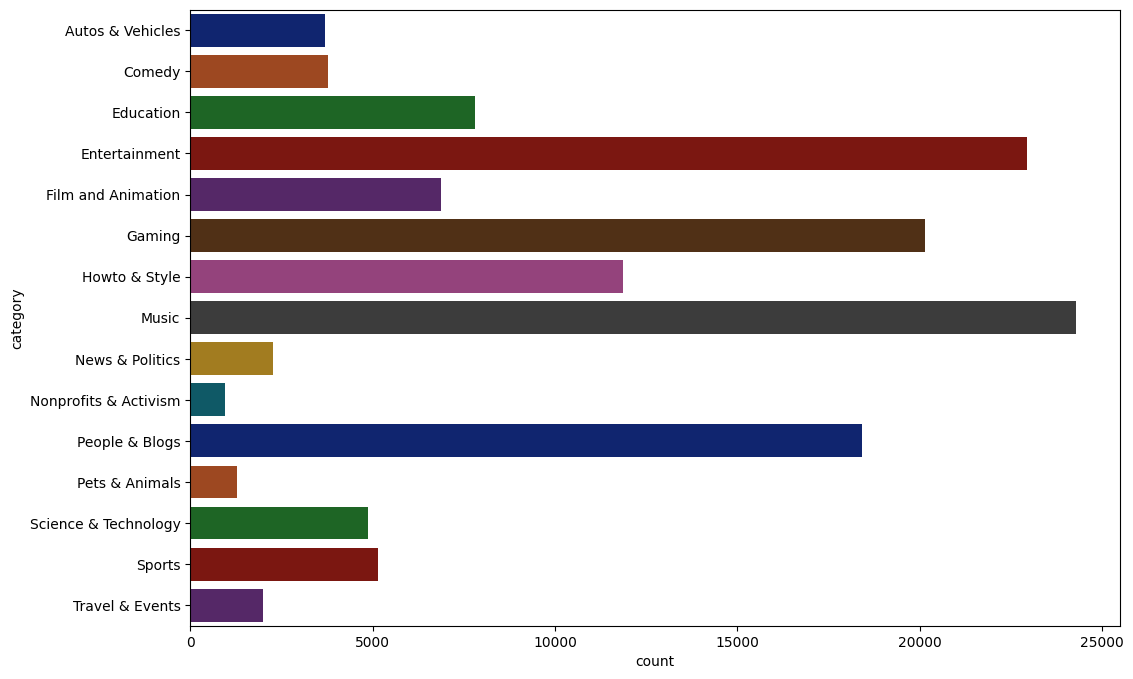

In [185]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(hue='category', y='category', x='count', data=df_gb_count, palette='dark')

In [172]:
df_gb_mean = df_gb.mean().reset_index()
df_gb_mean

,category,subs_sum,videos_sum,rank,weights
0,Autos & Vehicles,111158.375169,682.188664,396373.648043,7.680089
1,Comedy,432108.482347,287.109371,299991.221927,6.782554
2,Education,268202.635140,552.903883,327824.047033,6.868359
3,Entertainment,350246.526499,645.961602,323414.829934,6.903697
4,Film and Animation,228242.992727,325.526109,371171.466182,7.608686
5,Gaming,202039.122685,751.022839,375382.830694,7.744429
6,Howto & Style,233022.904842,392.432337,322855.754779,6.834346
7,Music,292157.255446,666.255529,366205.024585,7.420213
8,News & Politics,294673.487406,7844.407424,318111.243482,6.788842
9,Nonprofits & Activism,94647.703818,902.767802,436178.927761,8.362881


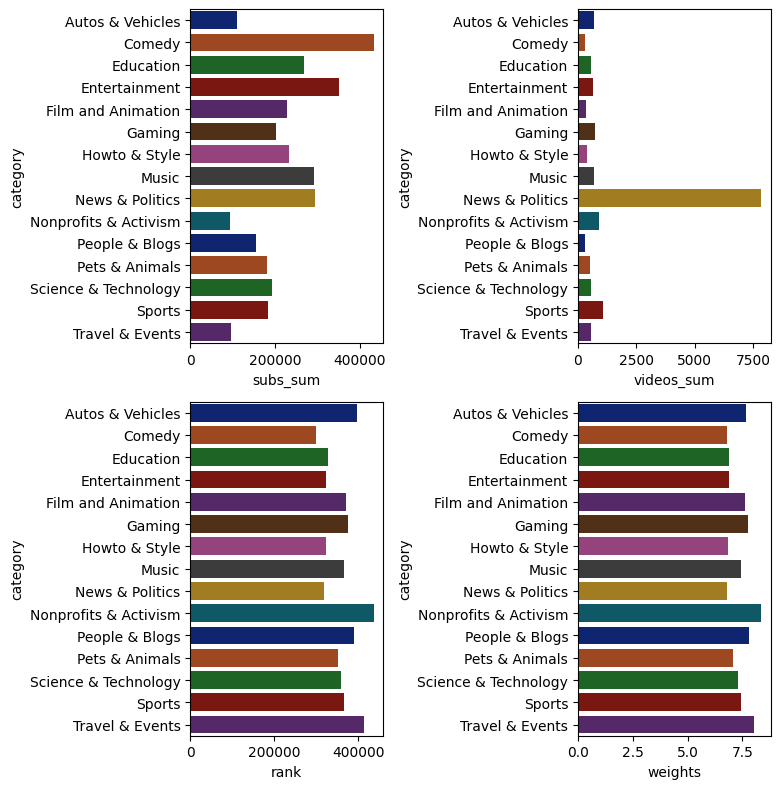

In [186]:
df_gb_mean = df_gb.mean().reset_index()
fig, ax = plt.subplots(2,2, figsize=(8, 8))
sns.barplot(hue='category', y='category', x='subs_sum', data=df_gb_mean, palette='dark', ax=ax[0, 0], )
sns.barplot(hue='category', y='category', x='videos_sum', data=df_gb_mean, palette='dark', ax=ax[0, 1])
sns.barplot(hue='category', y='category', x='rank', data=df_gb_mean, palette='dark', ax=ax[1, 0])
sns.barplot(hue='category', y='category', x='weights', data=df_gb_mean, palette='dark', ax=ax[1, 1])

plt.tight_layout()
plt.show()
